 # Pytorch Tutorial 
 
link for more informations [**The Full Original Tutorial**](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
What is PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

1.Getting Started
---------------

Tensors


Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.



In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
 #torch.empty()
torch.empty((2,3))

tensor([[1.2845e+31, 3.1100e-18, 1.2845e+31],
        [2.7253e+20, 3.1093e-18, 1.3556e-19]])

In [3]:
# torch.rand() 
torch.rand((3,4))

tensor([[0.7060, 0.3368, 0.0343, 0.7158],
        [0.5409, 0.2820, 0.2463, 0.1280],
        [0.7564, 0.7370, 0.6336, 0.8511]])

In [4]:
torch.rand(3,4) #random matrix

tensor([[0.5140, 0.9409, 0.2700, 0.3720],
        [0.7026, 0.4400, 0.0200, 0.3157],
        [0.4341, 0.5575, 0.6429, 0.2032]])

In [5]:
# torch.zeros()
torch.zeros((2,3))


tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [6]:
# torch.tensor()
torch.tensor([1,2,3])

tensor([1, 2, 3])

In [7]:
# torch.randn_like() i.e create a matrix with a size 
a = torch.zeros((2,3))
torch.randn_like(a)

tensor([[-0.0651, -0.0644,  1.1524],
        [ 0.3261,  0.1348, -0.2439]])

In [8]:
# size()
a.size()

torch.Size([2, 3])

In [9]:
# torch.add()
a = torch.rand(2,3)
b = torch.rand(2,3)
torch.add(a,b)

tensor([[1.2888, 1.6645, 1.3358],
        [0.3973, 0.8167, 1.2573]])

In [10]:
torch.sub(a,b)

tensor([[-0.0609,  0.0610,  0.3218],
        [-0.1021, -0.5633,  0.1557]])

In [11]:
x = torch.tensor([2,3,4])
y = torch.tensor([4,5,6])
print(x+y)
print(torch.add(x,y))
#print(torch.add_(x,y))

tensor([ 6,  8, 10])
tensor([ 6,  8, 10])


In [12]:
# item()
print(torch.rand(1))
torch.rand(1).item() #give the value of the array, only for shape 1

tensor([0.7782])


0.3326638340950012

In [13]:
# a.numpy()
# torch.from_numpy()
a = np.array([1,2,3])
torch.from_numpy(a) #from numpy to tensor


tensor([1, 2, 3])

In [14]:
print(torch.from_numpy(a).numpy()) #from tensor to numpy

[1 2 3]


In [15]:
 torch.cuda.is_available() #to check if you have GPU

False

In [16]:
%%time
a = torch.rand(1000,1000)
y = torch.rand_like(a)
for i in range(10):
    y = y**y

CPU times: user 152 ms, sys: 14 ms, total: 166 ms
Wall time: 55.2 ms


In [19]:
%%time
a = torch.rand(1000,1000)
# y = torch.rand_like(a, device='cuda') #put y in GPU
#for i in range(10):
#     y = y**y

CPU times: user 13.5 ms, sys: 260 µs, total: 13.8 ms
Wall time: 11.7 ms


# 2.Autograd: Automatic Differentiation


``` code
            def gradient(y,y_pred,x):
                    return np.dot(x.T,(y_pred-y))

```

In [20]:
x = torch.rand(1, requires_grad=True)  # requires_grad=True means we can calculate gradient in this variable
y = torch.rand(1, requires_grad=True)
z= torch.rand(1, requires_grad=True)

print(x.grad,y.grad,z.grad)
print(x,y)

None None None
tensor([0.4714], requires_grad=True) tensor([0.6405], requires_grad=True)


In [21]:
one = x * y       #two = (x*y)+z
two = one + z
three = torch.sigmoid(two)  #sigmoid of two

print(three)

tensor([0.6197], grad_fn=<SigmoidBackward>)


In [22]:
three.backward()   #backpropagation from three respect to 3 variables

print(x.grad,y.grad,z.grad)

tensor([0.1510]) tensor([0.1111]) tensor([0.2357])


In [23]:

32*32

1024

# CNN

In [24]:
#function to compute the shape of the image
def get_shape(h,p=0,k=3,s=1):    
    return ((h+(2*p)-k)/s)+1

In [25]:
get_shape(244,k=3,p=2) #output shape of the convolution layer

246.0

In [26]:
get_shape(244,k=3,p=2)//2 #get the output shape of maxpooling

123.0

In [27]:
#import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

## Defining the model

In [28]:
class Classification(nn.Module):
    def __init__(self):
        super(Classification,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3) # out_channels;any number different to 0
        self.conv2 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3)
        self.conv3 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,padding=2)
        self.conv4 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,padding=2)
        self.fc1 = nn.Linear(in_features=3*3*64,out_features=120)
        self.fc2 = nn.Linear(in_features = 120,out_features = 64)
        self.fc3 = nn.Linear(in_features = 64,out_features = 10) #the input and the output are simular


    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = F.max_pool2d(F.relu(self.conv3(x)),2)
        x = F.max_pool2d(F.relu(self.conv4(x)),2)

        # print(self.num_flat_features(x))
        x = x.view(-1,self.num_flat_features(x))

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

    def num_flat_features(self,x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        
        return num_features



In [29]:
net =  Classification()
print(net)

Classification(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
# from torchsummary import summary
# summary(net.to('cpu'), (3, 224, 224))

In [30]:
param = list(net.parameters()) #get the number of parameters
param[0].size()

torch.Size([64, 3, 3, 3])

In [31]:
param[0][0][0].size()  #the first kernel

torch.Size([3, 3])

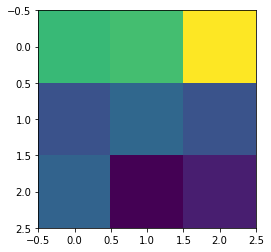

In [32]:
 filter_0 = param[0][0][0].detach().numpy()
plt.imshow(filter_0)

In [33]:
input = torch.randn(1, 3, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0757,  0.0932, -0.0718, -0.0962,  0.1020,  0.0733, -0.0348, -0.0351,
          0.0286,  0.0328]], grad_fn=<AddmmBackward>)


In [34]:
# Zero the gradient buffers of all parameters and backprops with random gradients:

net.zero_grad()
out.backward(torch.randn(1, 10))

In [35]:
# Loss Function
output = net(input)
target = torch.randn(10)  
target = target.view(1, -1) 

criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.0484, grad_fn=<MseLossBackward>)


In [36]:
loss.backward()
# net.conv1.weight.grad

In [37]:
import torch.optim as optim

input = torch.randn(1, 3, 32, 32) #random tensor
out = net(input)
print(out)

optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad() 
print(net.conv1.bias) #add bias 
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() #get gradient and update
print(net.conv1.bias) 

tensor([[ 0.0747,  0.0924, -0.0734, -0.0958,  0.1023,  0.0750, -0.0332, -0.0336,
          0.0280,  0.0315]], grad_fn=<AddmmBackward>)
Parameter containing:
tensor([-0.0468,  0.1007,  0.0442,  0.1430, -0.1267,  0.0036,  0.0686, -0.1490,
        -0.0846,  0.1668,  0.1552, -0.1008, -0.1688,  0.0842,  0.1912,  0.1754,
        -0.1919, -0.0501,  0.0321, -0.1884,  0.0540, -0.1509, -0.0529, -0.1213,
         0.1605, -0.0224, -0.1553,  0.1611, -0.0469,  0.1437,  0.0776,  0.0657,
         0.1638,  0.1164, -0.1048, -0.0913,  0.0912, -0.1088, -0.1833,  0.1640,
        -0.0252, -0.0797,  0.0649,  0.1152,  0.1675, -0.0304, -0.0839, -0.0188,
        -0.1778, -0.0100,  0.1115, -0.0643,  0.0930,  0.0896,  0.0306, -0.1753,
         0.1006,  0.0219,  0.0167, -0.1171,  0.0505, -0.0246, -0.1117,  0.1545],
       requires_grad=True)
Parameter containing:
tensor([-0.0468,  0.1007,  0.0442,  0.1430, -0.1267,  0.0036,  0.0687, -0.1490,
        -0.0846,  0.1668,  0.1552, -0.1008, -0.1688,  0.0842,  0.1912,  0

 ### See you in the next note book for the training part!